# Group Name: Gen 3

## Himani
## Rafi
## Ishpreet

# FBI Uniform Crime Reporting Analysis | 2012

*Author: Team members name*


## Table of Contents

1. Establishing connection with kaggle
2. Importing libraries
3. Importing dataset    
4. Basic Text Data Pre-processing & Cleaning Text Data
5. Preparing Data for Exploratory Data Analysis (EDA)
6. Exploratory Data Analysis
7. Feature Selection
8. Data modelling
9. Conclusion
10. Reference


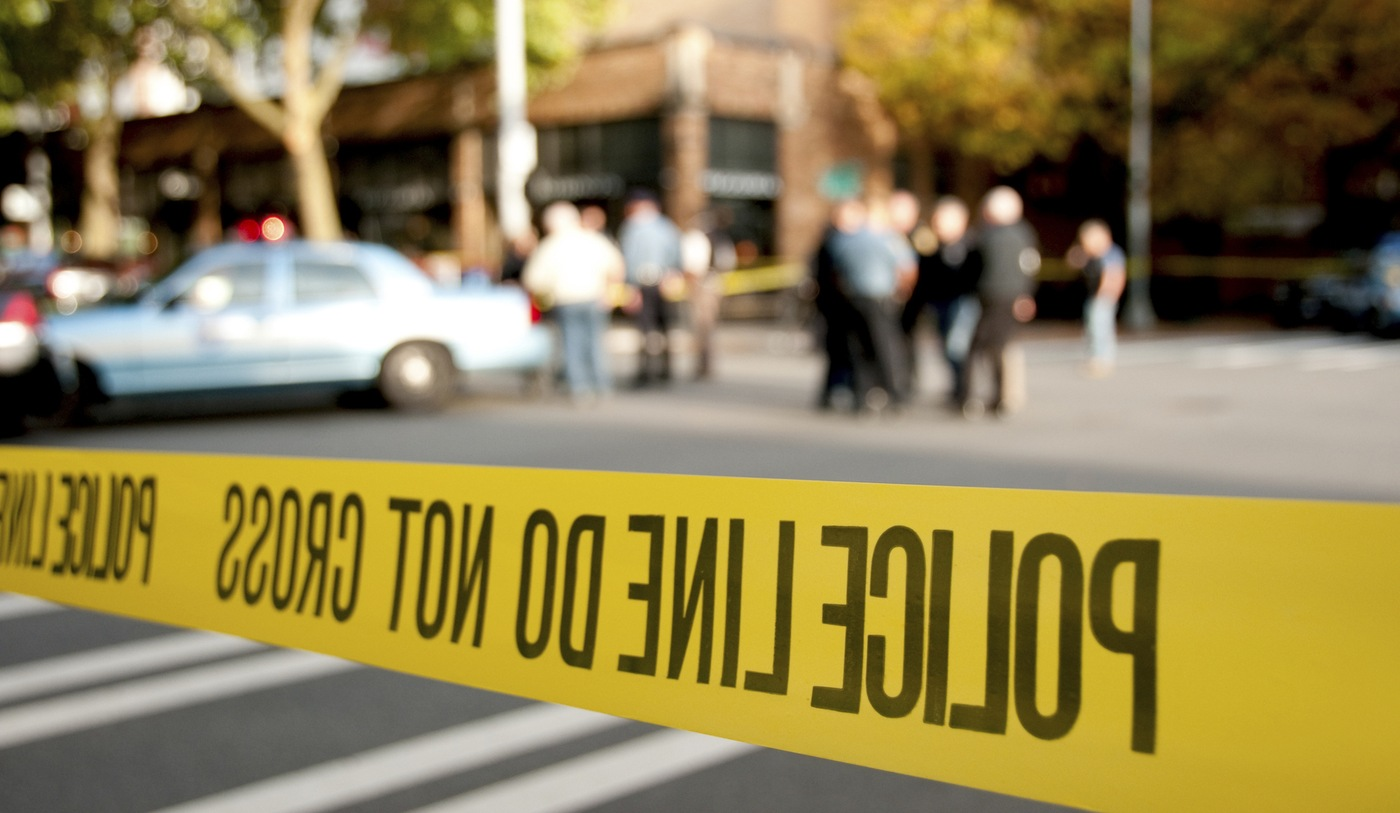

[Image Source](https://www.fbi.gov/news/stories/latest-crime-statistics-released)

># **2- Importing libraries**
---

In [1]:
import pandas as pd
import seaborn as sb
from google.colab import files
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

># **3- Importing dataset**
---

In [2]:
# IMPORT DATASET
"""
Data set has miscellaneous data in first 4 rows, so avoiding them before loading into dataframe

"""
from google.colab import files
file = files.upload()  
df_m = pd.read_excel('U.S._Offense_Type_by_Agency_2012.xlsx', skiprows=[0,1,2,3])
df_m.head()

Saving U.S._Offense_Type_by_Agency_2012.xlsx to U.S._Offense_Type_by_Agency_2012.xlsx


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations
0,ALABAMA,Cities,Hoover,82332.0,870.0,25.0,594.0,251.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,26.0
1,ARIZONA,Cities,Apache Junction,36986.0,559.0,96.0,381.0,82.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,25.0
2,NaN,NaN,Gilbert,214264.0,1242.0,123.0,892.0,227.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,75.0
3,NaN,Metropolitan Counties,Yuma2,NaN,555.0,94.0,376.0,85.0,26.0,26.0,...,NaN,NaN,NaN,NaN,NaN,5.0,2.0,1.0,1.0,40.0
4,ARKANSAS,Cities,Alma,5439.0,197.0,11.0,108.0,78.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0


In [3]:
"""
For coding convienence
"""
df = df_m.copy()


> # **4- Basic Text Data Pre-processing**
---

In [4]:
"""
Rename columns properly as part of data cleaning

First 4 columns are
  'State',
  'Agency_type', 
  'Agency_Name',
  'Population'

Replace special characters in remaining columns and add category as prefix to respective columns

"""

col = df.columns

column_mapping = {
    'Unnamed: 0': 'State', 'Unnamed: 1': 'Agency_type', 'Unnamed: 2': 'Agency_Name', 'Unnamed: 3': 'Population'
}

for c in col[4:21]:
  column_mapping[c] = f'C_A_Person_{c}'.replace('\n', '_')


for c in col[21:46]:
  column_mapping[c] = f'C_A_Property_{c}'.replace('\n', '_')

for c in col[46:59]:
  column_mapping[c] = f'C_A_Society_{c}'.replace('\n', '_')


df.rename(columns = column_mapping, inplace = True)
df.head()

,State,Agency_type,Agency_Name,Population,C_A_Person_Assault_Offenses,C_A_Person_Aggravated_Assault,C_A_Person_Simple_Assault,C_A_Person_Intimidation,C_A_Person_Homicide_Offenses,C_A_Person_Murder and Nonnegligent Manslaughter,...,C_A_Society_Gambling_Offenses,C_A_Society_Betting/_Wagering,C_A_Society_Operating/_Promoting/_Assisting_Gambling,C_A_Society_Gambling_Equipment_Violations,C_A_Society_Sports_Tampering,C_A_Society_Porno-_graphy/_Obscene_Material,C_A_Society_Prost-_itution_Offenses,C_A_Society_Prost-_itution,C_A_Society_Assisting_or Pro-_moting_Prost-_itution,C_A_Society_Weapon_Law_Violations
0,ALABAMA,Cities,Hoover,82332.0,870.0,25.0,594.0,251.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,26.0
1,ARIZONA,Cities,Apache Junction,36986.0,559.0,96.0,381.0,82.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,25.0
2,NaN,NaN,Gilbert,214264.0,1242.0,123.0,892.0,227.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,75.0
3,NaN,Metropolitan Counties,Yuma2,NaN,555.0,94.0,376.0,85.0,26.0,26.0,...,NaN,NaN,NaN,NaN,NaN,5.0,2.0,1.0,1.0,40.0
4,ARKANSAS,Cities,Alma,5439.0,197.0,11.0,108.0,78.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0


In [5]:
"""
Excel file has drill through format of data for state hierarchy. 
Imputing NaN values in 'State', 'Agency_type' using forward fill. 

Ensured imputation is done correctly

"""

cols = ['State', 'Agency_type']
df.loc[:,cols] = df.loc[:,cols].ffill()
df.head()

,State,Agency_type,Agency_Name,Population,C_A_Person_Assault_Offenses,C_A_Person_Aggravated_Assault,C_A_Person_Simple_Assault,C_A_Person_Intimidation,C_A_Person_Homicide_Offenses,C_A_Person_Murder and Nonnegligent Manslaughter,...,C_A_Society_Gambling_Offenses,C_A_Society_Betting/_Wagering,C_A_Society_Operating/_Promoting/_Assisting_Gambling,C_A_Society_Gambling_Equipment_Violations,C_A_Society_Sports_Tampering,C_A_Society_Porno-_graphy/_Obscene_Material,C_A_Society_Prost-_itution_Offenses,C_A_Society_Prost-_itution,C_A_Society_Assisting_or Pro-_moting_Prost-_itution,C_A_Society_Weapon_Law_Violations
0,ALABAMA,Cities,Hoover,82332.0,870.0,25.0,594.0,251.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,26.0
1,ARIZONA,Cities,Apache Junction,36986.0,559.0,96.0,381.0,82.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,25.0
2,ARIZONA,Cities,Gilbert,214264.0,1242.0,123.0,892.0,227.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,75.0
3,ARIZONA,Metropolitan Counties,Yuma2,NaN,555.0,94.0,376.0,85.0,26.0,26.0,...,NaN,NaN,NaN,NaN,NaN,5.0,2.0,1.0,1.0,40.0
4,ARKANSAS,Cities,Alma,5439.0,197.0,11.0,108.0,78.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0


In [6]:
"""
From dataset null values are meant to be replaced with 0, because we have empty cells if crime is not evident
"""

df.iloc[:, 3:] = df.iloc[:, 3:].fillna(0)
df.head()

,State,Agency_type,Agency_Name,Population,C_A_Person_Assault_Offenses,C_A_Person_Aggravated_Assault,C_A_Person_Simple_Assault,C_A_Person_Intimidation,C_A_Person_Homicide_Offenses,C_A_Person_Murder and Nonnegligent Manslaughter,...,C_A_Society_Gambling_Offenses,C_A_Society_Betting/_Wagering,C_A_Society_Operating/_Promoting/_Assisting_Gambling,C_A_Society_Gambling_Equipment_Violations,C_A_Society_Sports_Tampering,C_A_Society_Porno-_graphy/_Obscene_Material,C_A_Society_Prost-_itution_Offenses,C_A_Society_Prost-_itution,C_A_Society_Assisting_or Pro-_moting_Prost-_itution,C_A_Society_Weapon_Law_Violations
0,ALABAMA,Cities,Hoover,82332.0,870.0,25.0,594.0,251.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,26.0
1,ARIZONA,Cities,Apache Junction,36986.0,559.0,96.0,381.0,82.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0
2,ARIZONA,Cities,Gilbert,214264.0,1242.0,123.0,892.0,227.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,75.0
3,ARIZONA,Metropolitan Counties,Yuma2,0.0,555.0,94.0,376.0,85.0,26.0,26.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2.0,1.0,1.0,40.0
4,ARKANSAS,Cities,Alma,5439.0,197.0,11.0,108.0,78.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0


In [7]:
"""
Add computed column for Total Offences: Sum of all crime columns. 

"""

df['Total_Offences']= df.iloc[:, 4:].sum(axis=1)

df.head()

,State,Agency_type,Agency_Name,Population,C_A_Person_Assault_Offenses,C_A_Person_Aggravated_Assault,C_A_Person_Simple_Assault,C_A_Person_Intimidation,C_A_Person_Homicide_Offenses,C_A_Person_Murder and Nonnegligent Manslaughter,...,C_A_Society_Betting/_Wagering,C_A_Society_Operating/_Promoting/_Assisting_Gambling,C_A_Society_Gambling_Equipment_Violations,C_A_Society_Sports_Tampering,C_A_Society_Porno-_graphy/_Obscene_Material,C_A_Society_Prost-_itution_Offenses,C_A_Society_Prost-_itution,C_A_Society_Assisting_or Pro-_moting_Prost-_itution,C_A_Society_Weapon_Law_Violations,Total_Offences
0,ALABAMA,Cities,Hoover,82332.0,870.0,25.0,594.0,251.0,2.0,2.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,26.0,7616.0
1,ARIZONA,Cities,Apache Junction,36986.0,559.0,96.0,381.0,82.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0,4485.0
2,ARIZONA,Cities,Gilbert,214264.0,1242.0,123.0,892.0,227.0,5.0,5.0,...,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,75.0,16612.0
3,ARIZONA,Metropolitan Counties,Yuma2,0.0,555.0,94.0,376.0,85.0,26.0,26.0,...,0.0,0.0,0.0,0.0,5.0,2.0,1.0,1.0,40.0,4954.0
4,ARKANSAS,Cities,Alma,5439.0,197.0,11.0,108.0,78.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1325.0


> # **5- Preparing Data for Exploratory Data Analysis (EDA)**

In [8]:
"""
Task 1.1

Top 5 states with highest number of Assault offenses registered in all the agency types except cities. (Show pivot of sub-types of Assault offenses)

"""
non_city_df = df[df['Agency_type'] != 'Cities']

grouped_states = non_city_df[['State', 'C_A_Person_Assault_Offenses']].groupby('State').sum()
grouped_states.nlargest(5, ['C_A_Person_Assault_Offenses'])

,C_A_Person_Assault_Offenses
State,
SOUTH CAROLINA,52862.0
VIRGINIA,47129.0
TENNESSEE,33657.0
MICHIGAN,32420.0
OHIO,20224.0


In [9]:
"""
Task 1.2

2. Which category of crimes were most registered in universities?

"""

univ_df = df[df['Agency_type'] == 'Universities and Colleges']
grouped_univ_df = univ_df.iloc[:, 4:].sum()

grouped_univ_df.sort_values(ascending=False).head(1)


Total_Offences    83872.0
dtype: float64

Text(0, 0.5, 'Offences')

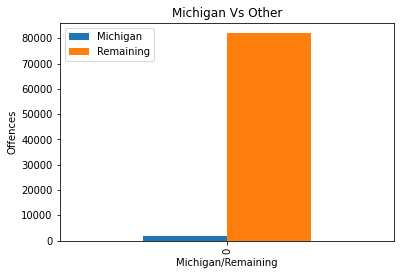

In [10]:
"""
Task 1.3

c. Compare offenses at Michigan State University with offenses at all other universities.

"""
from matplotlib import pyplot as plt
df['Total_Offences']

df[df['Agency_Name'] == 'Michigan State University']


michigan_count = df[df['Agency_Name'] == 'Michigan State University']['Total_Offences'].sum()

other_count = univ_df[univ_df['Agency_Name'] != 'Michigan State University']['Total_Offences'].sum()

plotdata = pd.DataFrame({
    "Michigan":[michigan_count],
    "Remaining":[other_count]
    }
)
plotdata.plot(kind="bar")
plt.title("Michigan Vs Other")
plt.xlabel("Michigan/Remaining")
plt.ylabel("Offences")

In [49]:
"""
Task 1.4
"""
df['digital_frauds'] = df['C_A_Property_Credit Card/_Automated_Teller_Machine Fraud'] + df['C_A_Property_Welfare_Fraud']

l_df = df[['State', 'digital_frauds']]. groupby('State').sum()

l_df.sort_values('digital_frauds').head(1)

,digital_frauds
State,
DISTRICT OF COLUMBIA,0.0


In [24]:
"""
Task 1. 5
"""
pop_df = df[df['Population'] != 0]
pop_df = pop_df[['Agency_type', 'Agency_Name', 'Population', 'Total_Offences']].groupby(['Agency_type', 'Agency_Name']).sum()

p_df = (pop_df['Total_Offences'] * 1000000 )/pop_df['Population']


p_df.sort_values(ascending=False).head(1)

# df[['Agency_type', 'Agency_Name']]

# df['Population']/1000000

Agency_type  Agency_Name
Cities       Lakeside       11125000.0
dtype: float64

In [33]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 42.8 MB/s 
     |████████████████████████████████| 16.7 MB 422 kB/s 


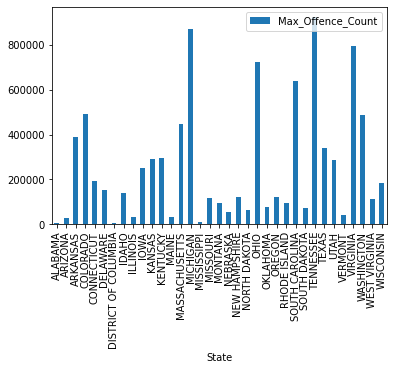

In [50]:
df.drop(df.tail(4).index,inplace = True)
df['Max_Offence_Count'] = df.iloc[:, 4:].max(axis=1)

prov_df = df[['State','Max_Offence_Count']].groupby('State').sum()
prov_df.head()

prov_df.plot.bar()


> # **6- Exploratory data analysis**

## Que - A

In [ ]:
"""
Prepare dataset for Modelling

Subset columns as mentioned in task

Data: X: Population, 
  Drug/Narcotic Offenses, 
  Drug/Narcotic Violations, 
  Drug Equipment Violations, 
  Theft from Building, 
  Theft from Coin-operated Machine,
   Theft from Motor Vehicle, 
   Theft of Motor Vehicle Parts or Accessories. 

Y: Total number of offenses
"""

X_cols = ['Population', 'C_A_Society_Drug/_Narcotic_Offenses', 'C_A_Society_Drug/_Narcotic_Violations', 'C_A_Society_Drug_Equipment_Violations', 
          'C_A_Property_Theft_From_Building', 'C_A_Property_Theft_From_Coin-_operated_Machine', 'C_A_Property_Theft_From_Motor_Vehicle', 'C_A_Property_Theft of_Motor_Vehicle_Parts or_Accessories',
]

X = df[X_cols]
y = df['Total_Offences']


# Que - B

In [ ]:
"""
Data partition
  Training Data: 75%
  Validation Data: 25%
"""

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

> # **7. Feature Selection**

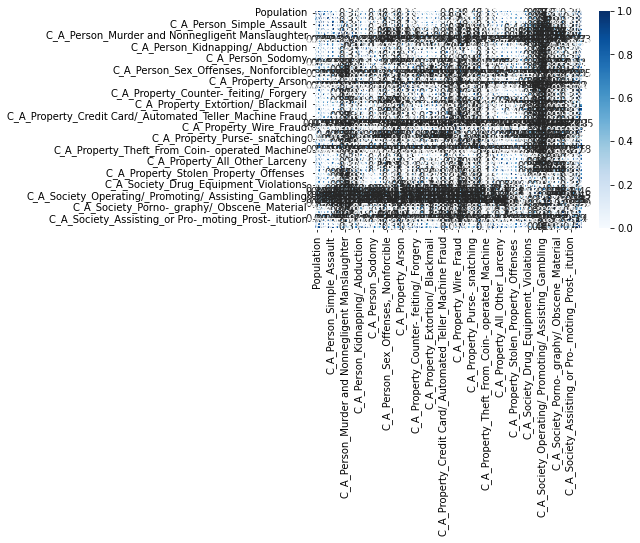

In [ ]:

corr = df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

In [ ]:
"""
Standardization using StandardScaler()
"""

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
"""
Perform PCA on X data and fit it
"""
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA()
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

> # **8. Data Modelling**

> ### **Modelling methods**

In [ ]:
"""
Perform PCA on X data and fit it
"""
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA()
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
"""
As mentioned train LinearRegression model and predict on X_test data
"""


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)

47.14108689325394
[ 0.0254065   1.33078132  7.97534502 -6.6445637   8.27308324  2.77047574
  6.42191101  4.79860563]


> ### **Models evaluation**

In [ ]:
"""
Regression evaluation

"""

import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score
print('R2 Score', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 Score 0.9193707574288946
Mean Absolute Error: 507.9424602785498
Mean Squared Error: 3535728.9538865127
Root Mean Squared Error: 1880.3534119644937


In [ ]:
"""
Linear regression model is doing so good.
Maybe feature provided are not relevant.


"""

# Model 2


In [ ]:
"""
MODEL 2

Another statistical model using non-offensive columns

We do On-Hot encoding for our categorical variables
And 
Split the data into train and test
"""

X = df.iloc[:, :4]
y = df['Total_Offences']

from sklearn.preprocessing import OneHotEncoder
X = OneHotEncoder().fit_transform(X).toarray()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [ ]:
"""
Gaussian Naive Bayes model
 and predict on X_test data

"""

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score
print('R2 Score', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 Score -0.027831863780864552
Mean Absolute Error: 1530.9770992366412
Mean Squared Error: 45072169.40916031
Root Mean Squared Error: 6713.5809676476165


> # **9- Conclusion**
---

In [ ]:
"""
Our model performed really bad. Due to time constraint we could not optimize our ML model to get better predictions.


We could have tried different other models considering various hyper parameters. Anyway we did good job. 

Thanks for Pizza..!

"""

'\nOur model perfoemd really bad. \n\n'

> # **10- Reference**
---

GOOGLE

and our creative and problem solving skills.